# Nasser Mohammed

## Research question/interests

My research interest is in and around what contributes to the most worker output, while prioritizing their life-work balance. Data on GDP produced per hour worked, seeing how productivity is linke to allotted vacation hours, and more are all areas I will be investigating. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [31]:
pwt = pd.read_csv("../data/raw/pwt100.csv",encoding='latin-1')


In [32]:
pwt.shape

(12810, 52)

In [37]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

## Exploring Variable Definitions

**RGDPE** Expenditure-side real GDP (millions 2005 USD)
- Uses prices for final goods that are constant across countries and over time

**RGDPO** Output-side real GDP (millions 2005 USD)
- Uses prices for final goods exports and imports that are constant across countries an over time

**POP** (millions)

**EMP** Employed per million
- Number of person(s) enganged in work per million

**AVH** Average Annual Hours worked by person Enganged

**HC** Human Capital Index

**CWTFP** Welfare-relevant TFP Levels at current PPPs (USA = 1 reference)

**CK** Capital stock (millions 2005 USD)

**XR** Exchange Rates (currency/USD)


In [42]:
pwt.nunique(axis=0) #183 countries, good to know!

countrycode        183
country            183
currency_unit      136
year                70
rgdpe            10399
rgdpo            10398
pop              10388
emp               9504
avh               3391
hc                8615
ccon             10399
cda              10399
cgdpe            10399
cgdpo            10394
cn               10314
ck                7027
ctfp              6347
cwtfp             6347
rgdpna           10387
rconna           10397
rdana            10397
rnna             10313
rkna              6958
rtfpna            6295
rwtfpna           6293
labsh             3155
irr               7251
delta            10311
xr                6083
pl_con           10398
pl_da            10396
pl_gdpo          10398
i_cig                5
i_xm                 3
i_xr                 2
i_outlier            2
i_irr                4
cor_exp           1641
statcap            220
csh_c            10390
csh_i            10397
csh_g            10395
csh_x            10397
csh_m      

In [43]:
pwt.describe()

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,12810.000000,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7095.000000
mean,1984.500000,3.048523e+05,3.070802e+05,30.962982,14.171167,1986.923200,2.087200,2.249465e+05,3.049463e+05,3.061396e+05,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.359145,1.334312
std,20.205986,1.214332e+06,1.218457e+06,116.189454,58.056973,284.003338,0.727413,8.882343e+05,1.236095e+06,1.226056e+06,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435645,1.941830
min,1950.000000,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.012977,0.064379
25%,1967.000000,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478804,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.164562,0.650612
50%,1984.500000,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.295903,0.955435
75%,2002.000000,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.447797,1.415420
max,2019.000000,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.649197,31.932846


In [46]:
pwt.xr.unique()

array([           nan, 1.79000000e+00, 2.86251000e-08, ...,
       1.28894179e+01, 9.99719998e-01, 9.99859999e-01])

In [54]:
pwt_s = pwt[['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc',  'cn', 'ctfp']].copy()

#These are the initial variables I'm interested in 

In [55]:
pwt_s.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,cn,ctfp
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
pwt_s.shape

(8967, 12)

In [56]:
"""
Lots of NaN values, so I used population as a good guideline for a
"If they dont know the population of the country this year they probably don't know the
total factor productivity level of the country" test.
"""
pwt_s.dropna(subset=['pop']) 


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,cn,ctfp
20,ABW,Aruba,Aruban Guilder,1970,400.081726,463.304108,0.059063,NaN,NaN,NaN,1313.093384,NaN
21,ABW,Aruba,Aruban Guilder,1971,436.486054,504.684326,0.059440,NaN,NaN,NaN,1440.541504,NaN
22,ABW,Aruba,Aruban Guilder,1972,476.160919,550.488647,0.059840,NaN,NaN,NaN,1580.743164,NaN
23,ABW,Aruba,Aruban Guilder,1973,519.418701,599.462647,0.060243,NaN,NaN,NaN,1732.009155,NaN
24,ABW,Aruba,Aruban Guilder,1974,566.945679,652.476135,0.060528,NaN,NaN,NaN,1902.454834,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617190,39798.644530,13.814629,6.393752,NaN,2.584653,61790.628910,0.386632
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203130,40963.191410,14.030331,6.504374,NaN,2.616257,64844.191410,0.385642
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175780,44316.742190,14.236595,6.611773,NaN,2.648248,67627.562500,0.402779
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109380,43420.898440,14.438802,6.714952,NaN,2.680630,68826.773440,0.382059


In [58]:
# I'm going to look at years between 1970 and 2019, for a consistent 1 year gap between rows
pwt_s = pwt_s[pwt_s['year'] > 1970]

<AxesSubplot:title={'center':'Correlation Matrix'}>

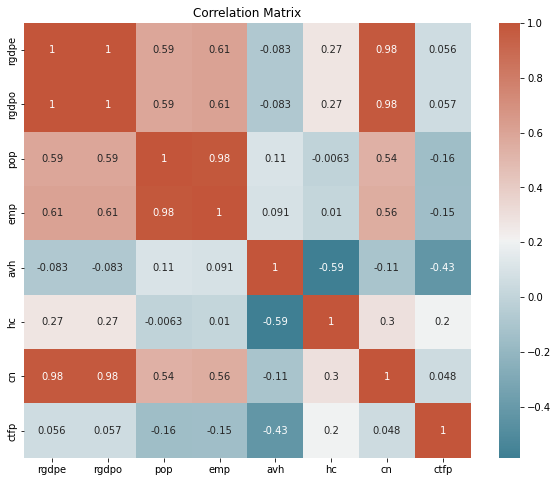

In [71]:
# calculate correlation matrix
fig, ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Matrix')
corr = pwt_s.drop(['year'], axis=1).corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From first look, there is strong correlation between number employed and the population (common sense but good to confirm)